# Real Data

Load the Housing_Price.csv and see the feature_discription.txt for more insight (However you don't need to remove any unneccesary feature just use encoding to convert the categorical features)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error

In [3]:
data=pd.read_csv('Housing_Price.csv')
data.head(5)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Street,Condition1,Condition2,CentralAir,HeatingQC,LotShape,LandContour
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,Pave,Norm,Norm,Y,Ex,Reg,Lvl
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,Pave,Feedr,Norm,Y,Ex,Reg,Lvl
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,Pave,Norm,Norm,Y,Ex,IR1,Lvl
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,Pave,Norm,Norm,Y,Gd,IR1,Lvl
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,Pave,Norm,Norm,Y,Ex,IR1,Lvl


which are categorical and which are numerical features?

#### **Street, Condition1, Condition2, CentralAir, HeatingQC, LotShape, LandContour** are the Categorical features. 

Remaining are the numerical features.

In [4]:
data.dtypes

Id                int64
MSSubClass        int64
LotArea           int64
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
BsmtFinSF1        int64
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageCars        int64
GarageArea        int64
WoodDeckSF        int64
OpenPorchSF       int64
EnclosedPorch     int64
3SsnPorch         int64
ScreenPorch       int64
PoolArea          int64
MiscVal           int64
MoSold            int64
YrSold            int64
SalePrice         int64
Street           object
Condition1       object
Condition2       object
CentralAir       object
HeatingQC        object
LotShape         object
LandContour     

Write a function for doing one hot encoding for all categorical features

Hint: Use pandas.get_dummies

In [5]:
def onehot_encoding(df,columns):
  for i in columns:  
    df=pd.concat([df,pd.get_dummies(df[i],prefix=i,drop_first=True)], axis=1)
  df=df.drop(columns,axis=1)
  return df
encoded=onehot_encoding(data,['Street', 'Condition1', 'Condition2', 'CentralAir', 'HeatingQC', 'LotShape', 'LandContour'])
encoded.head(5)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Street_Pave,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,CentralAir_Y,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


Seperate the Label from the data, here it is 'SalePrice'

In [6]:
X=encoded.drop('SalePrice',axis=1)
y=encoded['SalePrice']

In [7]:
X

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Street_Pave,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,CentralAir_Y,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1456,1457,20,13175,6,6,1978,1988,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
1457,1458,70,9042,7,9,1941,2006,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1458,1459,20,9717,5,6,1950,1996,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,2010,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1


In [8]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Split train test split with random state 42, test size 0.2

You can use sklearn module for this exercise

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Lasso Regression

1. search for alphas in range of 0.1 to 1000 for Lasso rigression, choose the best which minimizes the mse 
2. Plot the alphas vs MSE  

Hint:   
- cross validation score gives accuracy not the error convert to error appropriately (otherwise choose lambda which maximizes the score)


In the following cell, use training which was split earlier to cross validate (using cross_val_score) use cv = 5 (5 folds), then calculate the mean of the cross validation score for each alphas and plot $\lambda$ vs cross_valiadtion_score  or cross_validation_error. If you choose the accuracy then choose the $\lambda$ which maximizes the cross_val_score. 

For range of alphas use  alphas = np.logspace(-1, 3, 100)

Finally find the $\lambda$ which maximizes the score (or minimizes the error) (appropriate value of $\lambda$ is enough just by seeing the graph)

## Lasso

In [11]:
score_lasso=[]
for i in np.linspace(0.1,1000,1000):
  lasso=Lasso(alpha=i)
  score_lasso.append(cross_val_score(lasso, X_train, y_train, cv=5).mean())

Maximum cross_validation score is  0.7663660968980438
The lambda value where cross_validation score is maximum is  346.41171171171175


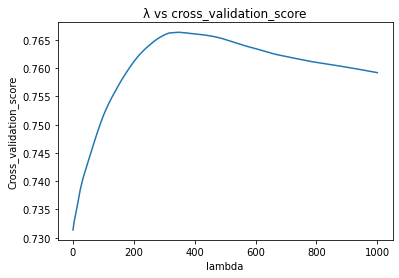

In [12]:
plt.plot(np.linspace(0.1,1000,1000),score_lasso)
plt.xlabel('lambda')
plt.ylabel('Cross_validation_score')
plt.title('λ vs cross_validation_score')
print('Maximum cross_validation score is ',max(score_lasso))
print('The lambda value where cross_validation score is maximum is ',np.linspace(0.1,1000,1000)[score_lasso.index(max(score_lasso))])

## Ridge Regression

1. search for alphas in range of 0.1 to 100 for Ridge rigression, choose the best which minimizes the mse 
2. Plot the alphas vs MSE


This similar to as explained for Lasso regression. Again plot $\lambda$ vs accuracy (or error) 

For range of alphas use  alphas = np.logspace(-1, 2, 100)

Finally find the $\lambda$ which maximizes the score (or minimizes the error) (appropriate value of $\lambda$ is enough just by seeing the graph)


In [13]:
score=[]
for i in np.linspace(0.1,100,100):
  ridge=Ridge(alpha=i)
  score.append(cross_val_score(ridge, X_train, y_train, cv=5).mean())

Maximum cross_validation score is  0.7663198873713786
The lambda value where cross_validation score is maximum is  35.418181818181814


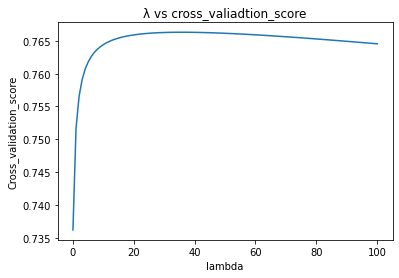

In [14]:
plt.plot(np.linspace(0.1,100,100),score)
plt.xlabel('lambda')
plt.ylabel('Cross_validation_score')
plt.title('λ vs cross_valiadtion_score')
print('Maximum cross_validation score is ',max(score))
print('The lambda value where cross_validation score is maximum is ',np.linspace(0.1,100,100)[score.index(max(score))])

### We can see that the Ridge and Lasso models have the high cross validation scores compared to normal linear regression model

In [17]:
linear=LinearRegression()
cross_val_score(linear, X_train, y_train, cv=5).mean()

0.7313648163227001

Now you have $\lambda$ values for both ridge and lasso regression, predict the model on the test data you created earlier

In the following cell use selected $\lambda$ as the model parameter, predict on test data, compare among three models and report your findings. 




Finally use lasso regression to find the important features and write your observations and also what do you observe when you compare both coefficients of Ridge and Lasso ? Do you see any property of Lasso which is used?
 
Hint: 
- Check weights corresponding to each features


Note:
- Don't worry if you have huge error in prediction, it is possible, just compare among models and report which has lease error.


### LASSO

In [28]:
lamda=np.linspace(0.1,1000,1000)[score_lasso.index(max(score_lasso))]
lasso=Lasso(alpha=lamda)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
coef_lasso=lasso.coef_
error_lasso=mean_squared_error(y_test,y_pred)
print('coefficient of lasso model ', coef_lasso)
print('MSE for lasso model ', error_lasso)

coefficient of lasso model  [-2.24232954e+00 -1.85312703e+02  3.91654841e-01  1.85040565e+04
  3.58006967e+03  3.30968696e+02  1.90604389e+02  1.45786875e+01
  0.00000000e+00  2.57378518e+00  1.72139955e+00  4.32722093e+01
  4.21308888e+01  3.45723242e+01  5.51465373e+00  8.17073103e+03
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -6.91052332e+03
 -0.00000000e+00  3.87824870e+03  3.80149790e+03  7.85685368e+03
  1.23572727e+01  2.73701838e+01  1.22428822e-01  1.20597334e+01
  3.87826946e+01  6.50999859e+01 -3.31253882e+01 -8.66524222e-01
 -2.98654187e+02 -2.09005682e+02  0.00000000e+00 -0.00000000e+00
  1.20275479e+04 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -3.71182799e+03 -0.00000000e+00 -3.33853393e+03  1.70223806e+03
 -2.35992163e+03 -5.05200675e+02  1.36711473e+04  0.00000000e+

### RIDGE

In [29]:
lamda=np.linspace(0.1,100,100)[score.index(max(score))]
ridge=Ridge(alpha=lamda)
ridge.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)
error_ridge=mean_squared_error(y_test,y_pred_ridge)
coef_ridge=ridge.coef_
print('coefficient of ridge model ', coef_ridge)
print('MSE for ridge model ', error_ridge)

coefficient of ridge model  [-2.37897380e+00 -1.77203193e+02  3.59135455e-01  1.75517847e+04
  4.23314944e+03  3.35054032e+02  1.66704738e+02  1.11720843e+01
 -3.76270295e+00 -8.48569438e-01  6.56081172e+00  1.42511345e+01
  1.29802952e+01  5.59285956e+00  3.28242892e+01  8.69167741e+03
 -1.57395781e+03  2.15587158e+03 -2.36555101e+02 -7.52846567e+03
 -4.92907647e+03  4.62352765e+03  4.57073336e+03  8.14176384e+03
  1.18959035e+01  2.60518537e+01 -2.49917168e+00  1.25561610e+01
  3.65422764e+01  6.24611020e+01 -3.14390702e+01 -8.12348844e-01
 -3.06298289e+02 -4.40376726e+02  1.43618318e+03 -2.64542862e+03
  1.03074464e+04 -1.55214959e+03 -3.70340887e+03 -2.97020095e+03
  5.21472670e+02  9.15138318e+01  7.24161589e+02  2.95987957e+01
  4.43655277e+03  9.57249172e+02 -6.76008525e+03 -3.94664105e+02
 -1.21760175e+01 -3.86726108e+01 -4.08769533e+03 -5.49970348e+02
 -5.65642442e+03 -1.76059238e+02 -5.02653630e+03  6.26826327e+03
 -1.00350525e+04 -1.69006209e+03  1.27847501e+04  3.41660554e+

### LINEAR

In [30]:
linear.fit(X_train,y_train)
y_pred_linear=linear.predict(X_test)
error_linear=mean_squared_error(y_test,y_pred_linear)
coef_linear=linear.coef_
print('coefficient of linear model ', coef_linear)
print('MSE for linear model ', error_linear)

coefficient of linear model  [-2.56047302e+00 -1.73513991e+02  4.56578242e-01  1.75538830e+04
  4.54835333e+03  3.35101523e+02  1.34998493e+02  1.23080722e+01
 -3.74073207e+00 -1.36990585e+00  7.19743430e+00  1.54937555e+01
  1.19219736e+01  7.64265883e+00  3.50583878e+01  8.74543835e+03
 -3.68268534e+03  1.78782534e+03  2.33136721e+02 -8.25583442e+03
 -1.15338708e+04  5.03502021e+03  3.81483785e+03  8.43019197e+03
  9.28743336e+00  2.06487010e+01 -4.41346295e+00  1.23712774e+01
  2.03572901e+01  5.69924693e+01 -2.36710255e+01 -4.86529824e-01
 -2.79051097e+02 -4.96030608e+02  2.43714083e+04 -9.13910984e+01
  1.26681301e+04 -1.03481094e+04  5.74463447e+03 -1.23477197e+04
  5.18964390e+03  5.18955447e+03  1.42758944e+04 -5.16980656e+04
 -3.93398975e+04 -6.74095073e+03 -1.81165469e+05 -5.98512679e+04
 -3.62819122e+04 -5.72632052e+04 -1.01400924e+04 -5.09312641e+03
 -8.26483719e+03 -2.55731884e+03 -6.80913774e+03  1.03768388e+04
 -6.27351037e+04 -1.19908195e+03  3.84611090e+04  1.96513117e

## OBSERVATIONS

The model with least error is **Ridge model**. 

Also we can observe that some coefficients in lasso model are absolute zeros, which means those features are of no use. The non-zero coefficient features are important.

From observing the coefficients of Lasso and Ridge model we can see that the coefficients in Lasso model are absolute zero whereas Ridge model have coefficients close to zero. Which is because of square shaped cost function in the case of Lasso, because of which the solution attains absolute zero at the corners. 

## IMPORTANT FEATURES

Which have non-zero coefficients

In [33]:
for i in range(len(coef_lasso)):
  if coef_lasso[i]!=0:
    print(X.columns[i])
  else:
    continue

Id
MSSubClass
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BedroomAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
Condition1_Norm
HeatingQC_Gd
HeatingQC_TA
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
